In [8]:
import pandas as pd
import numpy as np

polluters = pd.read_csv('honeypot_data/content_polluters.txt', sep='\t', names=['UserID', 'CreatedAt', 'CollectedAt', 'NumberOfFollowings', 'NumberOfFollowers', 'NumberOfTweets', 'LengthOfScreenName', 'LengthOfDescriptionInUserProfile'], parse_dates=['CreatedAt', 'CollectedAt'])
polluters = polluters.set_index('UserID')

legit = pd.read_csv('honeypot_data/legitimate_users.txt', sep='\t', names=['UserID', 'CreatedAt', 'CollectedAt', 'NumberOfFollowings', 'NumberOfFollowers', 'NumberOfTweets', 'LengthOfScreenName', 'LengthOfDescriptionInUserProfile'], parse_dates=['CreatedAt', 'CollectedAt'])
legit = legit.set_index('UserID')

pol_following = pd.read_csv('honeypot_data/content_polluters_followings.txt', sep='\t', names=['UserID', 'SeriesOfFollowings'])
pol_following = pol_following.set_index('UserID')

leg_following = pd.read_csv('honeypot_data/legitimate_users_followings.txt', sep='\t', names=['UserID', 'SeriesOfFollowings'])
leg_following = leg_following.set_index('UserID')

Above takes in the two csv files that are needed for this feature. 

Below, I drop the unneccesary columns from the original user account dataframe. Then I merge the account and following dataframes into one concise df. I will need to do the change over time, and the amount of changes total for both classifications. I can even plot a couple of these series to show the differences in the two accounts. 

## I need to make the following df a list of numbers, not one big string.

Use: [int(s) for s in example_string.split(',')]

In [9]:
polNet = polluters.drop(['CreatedAt', 'CollectedAt', 'NumberOfTweets', 'LengthOfScreenName', 'LengthOfDescriptionInUserProfile'], axis=1)
legNet = legit.drop(['CreatedAt', 'CollectedAt', 'NumberOfTweets', 'LengthOfScreenName', 'LengthOfDescriptionInUserProfile'], axis=1)

for index, row in pol_following.iterrows():
    row[0] = [int(s) for s in row[0].split(',')]

for index, row in leg_following.iterrows():
    row[0] = [int(s) for s in row[0].split(',')]


polNet = pd.concat([polNet, pol_following], axis=1, join_axes=[polNet.index])
legNet = pd.concat([legNet, leg_following], axis=1, join_axes=[legNet.index])
#look into the changes of the following numbers
#average change in the followings
#following data is the number of following, collected at equal intervals i assume?

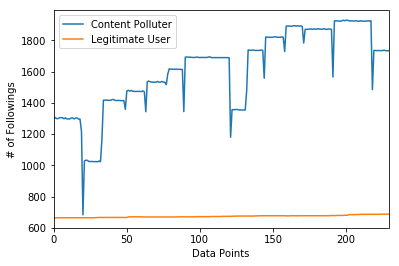

In [10]:
import matplotlib.pyplot as plt
import matplotlib.mlab as PCA

polSeries1 = pd.Series.from_array(polNet.iloc[0, -1])
polSeries2 = pd.Series.from_array(polNet.iloc[1000, -1])

legSeries1 = pd.Series.from_array(legNet.iloc[0, -1])
legSeries2 = pd.Series.from_array(legNet.iloc[0, -1])


polSeries2.plot(label='Content Polluter')
legSeries2.plot(label='Legitimate User')
plt.xlabel('Data Points')
plt.ylabel('# of Followings')
plt.legend()
#x axis is data collection points
#y axis is number of followings
#blue is bot, orange is legit
plt.show()

In [11]:
def compileRatio(dataframe):
    usersRatios = {}
    for index, row in dataframe.iterrows():
        dfRatio = {'Following/Followers': 0}
        
        if row[1] == 0:
            dfRatio['Following/Followers'] = 0
            #Change this to the number of following then
        else:
            dfRatio['Following/Followers'] = row[0]/row[1]
        
        usersRatios[index] = dfRatio
        
    usersRatios = pd.DataFrame.from_dict(usersRatios).T
        
    return usersRatios

In [12]:
dfPol = compileRatio(polNet)
dfLeg = compileRatio(legNet)

polNet = pd.concat([polNet, dfPol], axis=1, join_axes=[polNet.index])
legNet = pd.concat([legNet, dfLeg], axis=1, join_axes=[legNet.index])

legNet

,NumberOfFollowings,NumberOfFollowers,SeriesOfFollowings,Following/Followers
UserID,,,,
614,510,350,"[664, 664, 664, 665, 665, 665, 665, 665, 665, ...",1.457143
1038,304,443,"[378, 378, 378, 378, 378, 378, 378, 378, 378, ...",0.686230
1437,45,73,"[59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 5...",0.616438
2615,211,230,"[262, 262, 262, 262, 262, 262, 262, 262, 262, ...",0.917391
3148,7346,7244,"[5238, 5238, 5238, 5238, 5238, 5238, 5238, 523...",1.014081
5593,898,1024,"[868, 868, 868, 868, 868, 868, 868, 868, 868, ...",0.876953
9375,53,131,"[65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6...",0.404580
10336,754,4103,"[803, 803, 803, 803, 803, 803, 803, 803, 803, ...",0.183768
10455,140,222,"[251, 251, 252, 254, 254, 254, 254, 254, 254, ...",0.630631


In [13]:
testPol = polNet.drop(['SeriesOfFollowings'], axis=1)
testLeg = legNet.drop(['SeriesOfFollowings'], axis=1)

In [14]:
polNet.to_csv('created_data/userNetworkPol.csv', encoding='utf-8')
legNet.to_csv('created_data/userNetworkLeg.csv', encoding='utf-8')

In [15]:
testPol

,NumberOfFollowings,NumberOfFollowers,Following/Followers
UserID,,,
6301,3269,3071,1.064474
10836,1949,793,2.457755
10997,1119,9644,0.116031
633293,2174,6029,0.360590
717883,7731,7029,1.099872
763068,120,130,0.923077
783705,1660,23977,0.069233
788352,1320,969,1.362229
810011,11239,10537,1.066622


In [16]:
testPol.to_csv('created_data/userNetworkPol.csv', encoding='utf-8')
testLeg.to_csv('created_data/userNetworkLeg.csv', encoding='utf-8')